Setting up kaggle in the colab environment.

In [1]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
!mkdir ~/.kaggle

In [0]:
import json
token = {'username':'enter-your-username','key':'enter-your-key'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)



In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-04-25 00:03:33          58961  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            262  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           5933  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             44  
doaaalsenani/usa-cers-dataset                               US C

Downloading the chest-xray-pneumonia dataset from Kaggle.

In [9]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content

 99% 2.28G/2.29G [00:30<00:00, 21.0MB/s]
100% 2.29G/2.29G [00:30<00:00, 81.1MB/s]


In [ ]:
!unzip \*.zip

Above are the steps to set up kaggle in your colab environment and to download the dataset using the kaggle API.

In [0]:
import os
from shutil import copyfile,move
from os import getcwd
import random
import cv2

In [0]:
# Defining the path to the directory with our data
base_dir=f'{getcwd()}/chest_xray/chest_xray/'

In [0]:
#Defining paths to train,val,test directories
training_dir = os.path.join(base_dir,"train")
validation_dir = os.path.join(base_dir,"val")
testing_dir = os.path.join(base_dir,"test")


**Let's create new train,val and test folders for the data that is split from the original dataset**


In [0]:
#Creating a custom folder 
os.mkdir("/content/chest_xray/custom")

#Setting the path to the custom folder 
custom_dir = f'{getcwd()}/chest_xray/custom'

#Defining paths for the new train,val and test directories
custom_train_dir=os.path.join(custom_dir , "train")
custom_val_dir=os.path.join(custom_dir , "val")
custom_test_dir=os.path.join(custom_dir , "test")


In [0]:
#Creating the new directories
os.mkdir(custom_val_dir)
os.mkdir(custom_test_dir)
os.mkdir(custom_train_dir)

#Creating the sub-directories
os.mkdir(custom_train_dir +"/BACTERIAL_PNEUMONIA")
os.mkdir(custom_train_dir + "/VIRAL_PNEUMONIA")
os.mkdir(custom_val_dir + "/BACTERIAL_PNEUMONIA")
os.mkdir(custom_val_dir + "/VIRAL_PNEUMONIA")
os.mkdir(custom_test_dir + "/BACTERIAL_PNEUMONIA")
os.mkdir(custom_test_dir + "/VIRAL_PNEUMONIA")


A function to split the Pneumonia dataset into bacterial and viral cases into our custom train,val and test folders.If we look closely into the pneumonia image files, we can see that they are tagged as either bacteria or viral in their file names denoting the nature of the case.This function does a simple python substring match to split the images accordingly.

In [0]:
from PIL import Image



def split_data(SOURCE,DEST,is_train=False):
  source_split_path = os.path.join(SOURCE , "PNEUMONIA")
  #Lists the images in the directory
  data=os.listdir(source_split_path)
   
  for image in data:
    image_destination=os.path.join(source_split_path,image)
   #Checks which category does the image belong to based on its file name
    if "bacteria" in image and os.path.getsize(image_destination):
      copy_destination = os.path.join(DEST , "BACTERIAL_PNEUMONIA",image) 
    elif "virus" in image and os.path.getsize(image_destination):
      copy_destination = os.path.join(DEST , "VIRAL_PNEUMONIA" , image)
    try:
      #Verifying if the image is corrupted or not using pillow
      img = Image.open(image_destination)
      img.verify()
      #Converting greyscale train images to 3 channel ones
      if is_train:
        img = cv2.imread(str(image_destination))
        if img.shape[2] == 1:
          img = np.dstack([img, img, img])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        cv2.imwrite(copy_destination, img)

      else:
        # Copy file to the destination
        copyfile(image_destination, copy_destination)
    except:
      pass

  

In [0]:
split_data(training_dir,custom_train_dir,True)

In [0]:
split_data(validation_dir,custom_val_dir)


In [0]:
split_data(testing_dir,custom_test_dir)


Okay now we have split the pneumonia cases into two categories and copied them over to the respective sets.Now let's see how this data looks.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Defining paths for the newly created directories 
train_bacterial_dir = os.path.join(custom_train_dir ,"BACTERIAL_PNEUMONIA")
train_viral_dir = os.path.join(custom_train_dir ,"VIRAL_PNEUMONIA")
val_bacterial_dir = os.path.join(custom_val_dir ,"BACTERIAL_PNEUMONIA")
val_viral_dir = os.path.join(custom_val_dir ,"VIRAL_PNEUMONIA")
test_bacterial_dir = os.path.join(custom_test_dir ,"BACTERIAL_PNEUMONIA")
test_viral_dir = os.path.join(custom_test_dir ,"VIRAL_PNEUMONIA")




In [0]:
#Listing out the number of files in directory 
train_bacterial_cases = len(os.listdir(train_bacterial_dir))
train_viral_cases = len(os.listdir(train_viral_dir))
val_bacterial_cases = len(os.listdir(val_bacterial_dir))
val_viral_cases = len(os.listdir(val_viral_dir))
test_bacterial_cases = len(os.listdir(test_bacterial_dir ))
test_viral_cases = len(os.listdir(test_viral_dir ))


**How many samples of each category
 are there in the dataset?** 

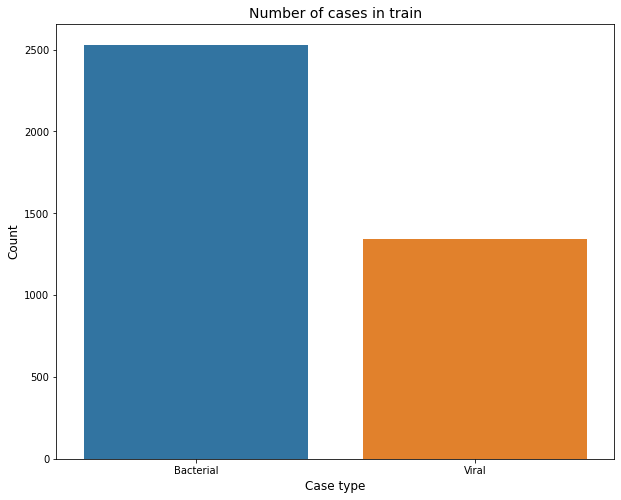

In [16]:
# Plot the results in train
plt.figure(figsize=(10,8))
sns.barplot(x=[0,1], y=[train_bacterial_cases,train_viral_cases] )
plt.title('Number of cases in train', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(2), ['Bacterial', 'Viral'])
plt.show()

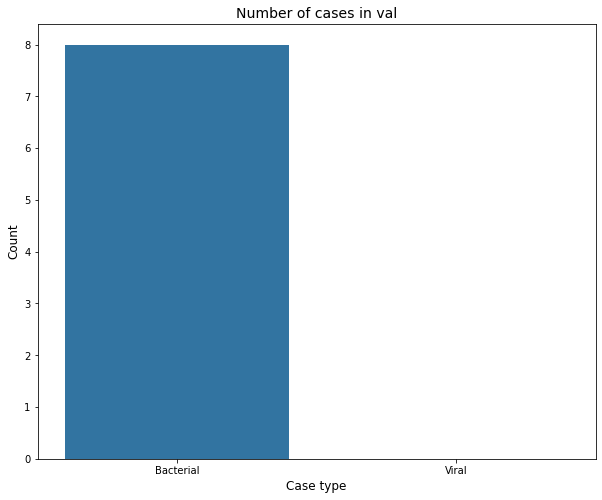

In [17]:
# Plot the results in val
plt.figure(figsize=(10,8))
sns.barplot(x=[0,1], y=[val_bacterial_cases,val_viral_cases] )
plt.title('Number of cases in val', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(2), ['Bacterial', 'Viral'])
plt.show()

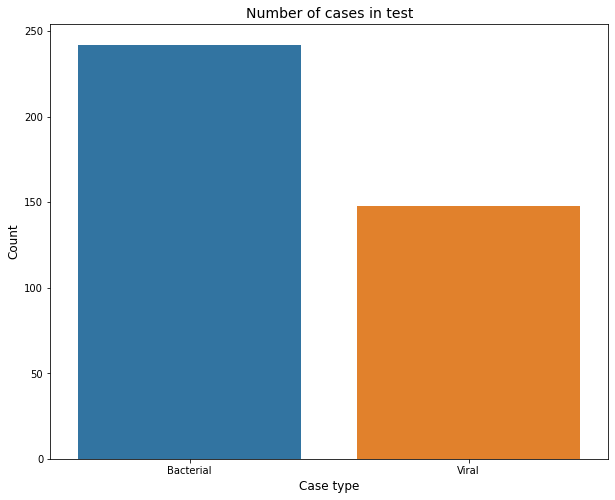

In [18]:
# Plot the results in test
plt.figure(figsize=(10,8))
sns.barplot(x=[0,1], y=[test_bacterial_cases,test_viral_cases] )
plt.title('Number of cases in test', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(2), ['Bacterial', 'Viral'])
plt.show()

An anomaly that can be seen is that in the validation set is that there are no viral cases and the total number of cases are also very low.We wouldn't be able to infer much from this validation set while training.Hence let's enrich the validation set by moving over about 20% of the cases from the train set.

In [0]:
from PIL import Image

#Function to move files
def move_data(source,dest,split_size):

  data=os.listdir(source)
  shuffled=random.sample(data, len(data))
  split= round(len(shuffled)*split_size)
  for image in shuffled[split:]:
    source_path=os.path.join(source,image)
    dest_path=os.path.join(dest,image)
    if os.path.getsize(source_path):
      move(source_path,dest_path)
    

    # if os.path.getsize(source_path):


In [0]:
move_data(train_bacterial_dir,val_bacterial_dir,0.8)

In [0]:
move_data(train_viral_dir,val_viral_dir,0.8)


Reiniatialising the case numbers in train and val directories.

In [0]:
new_train_bacterial_cases = len(os.listdir(train_bacterial_dir))
new_train_viral_cases = len(os.listdir(train_viral_dir))
new_val_bacterial_cases = len(os.listdir(val_bacterial_dir))
new_val_viral_cases = len(os.listdir(val_viral_dir))

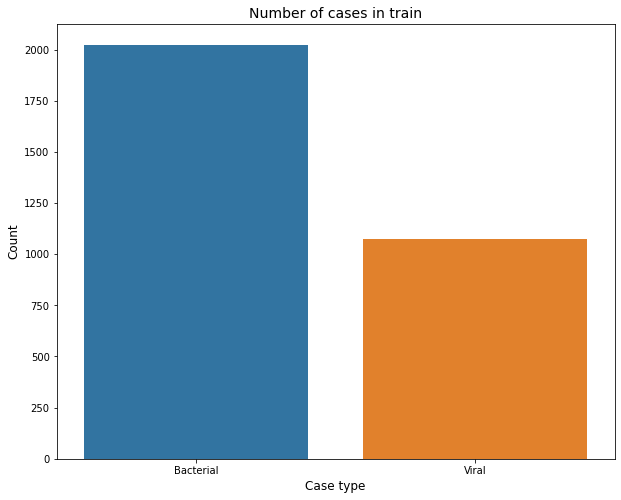

In [23]:
# Plot the results in custom test
plt.figure(figsize=(10,8))
sns.barplot(x=[0,1], y=[new_train_bacterial_cases,new_train_viral_cases] )
plt.title('Number of cases in train', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(2), ['Bacterial', 'Viral'])
plt.show()

Bacterial cases are twice as much as the viral cases therefore class weights should be set accordindly to improve strike recall/precision balance.

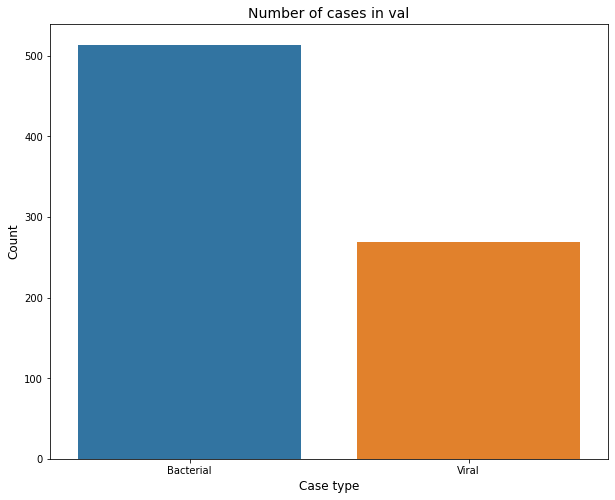

In [24]:
# Plot the results in custom val
plt.figure(figsize=(10,8))
sns.barplot(x=[0,1], y=[new_val_bacterial_cases,new_val_viral_cases] )
plt.title('Number of cases in val', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(2), ['Bacterial', 'Viral'])
plt.show()

Okay so here we can see that we have moved 20% of the cases from train to val.Let's set up for training using CNN and transfer learning. 

Before that, let's take a look at a few pictures to get a better sense of what the bacterial and viral cases look like. First, configure the matplot parameters:

# Visualising data

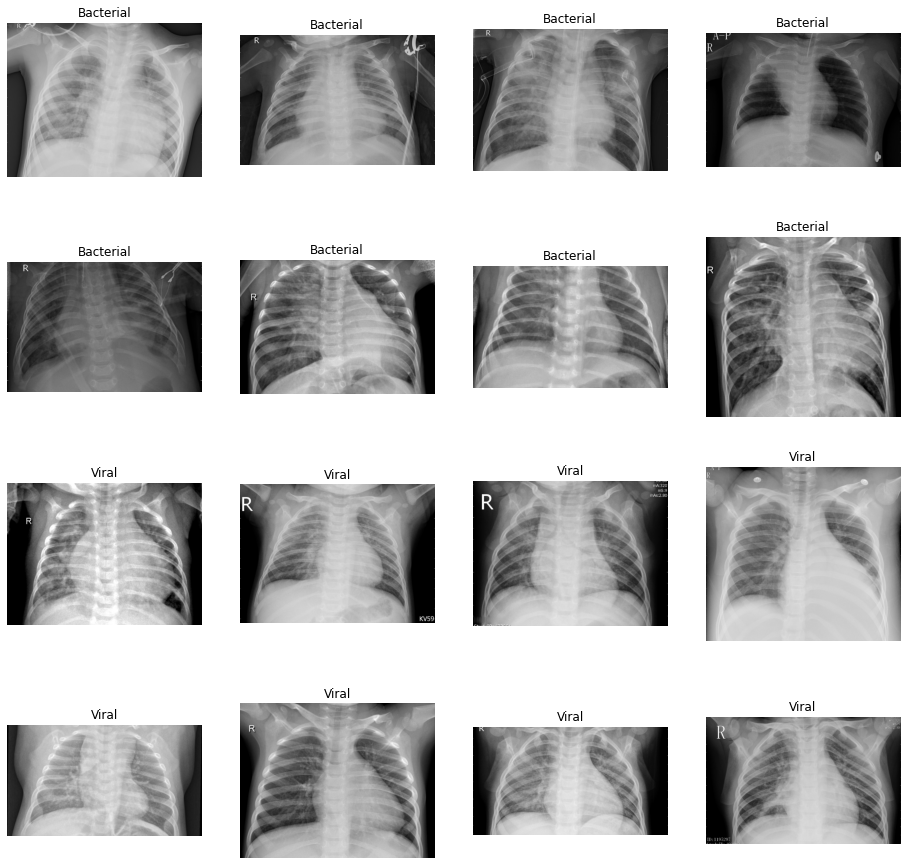

In [42]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Getting the list of bacterial and viral cases from train
new_train_bacterial_fnames=os.listdir(train_bacterial_dir)
new_train_viral_fnames=os.listdir(train_viral_dir)




# Plotting
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_bacterial_pix = [os.path.join(train_bacterial_dir, fname) 
                for fname in new_train_bacterial_fnames[ pic_index-8:pic_index] 
               ]

next_viral_pix = [os.path.join(train_viral_dir, fname) 
                for fname in new_train_viral_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_bacterial_pix + next_viral_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  if "bacteria" in img_path:
    sp.set_title("Bacterial")
  elif "virus" in img_path:
    sp.set_title("Viral")

  img = mpimg.imread(img_path)
  plt.imshow(img,cmap="gray")

plt.show()


To the untrained eyes these scans are indistinguishable.Now let's train!!


# Model
We will be using transfer learning using inception-v3 pre-trained on the ImageNet dataset.The core idea behind transfer learning for image classification is that a model trained on a large and general dataset will act as a general model of the data it was trained on, which in this case is millions of images.Hence we can take advantage of the learned features without having to train the model from scratch.

We add on a few layers of our own to the end of the network after discarding end layers from the preloaded network and train these layers exclusively rather than the entire network.

In [27]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
# tf.keras.applications.ResNet50


image_size = 224
pre_trained_model = InceptionV3(
  input_shape = (image_size, image_size, 3),
  include_top = False,
  weights = 'imagenet')

# Setting the layers in the pre-trained network to not be trainable aka freezing
for layer in pre_trained_model.layers:
  layer.trainable = False


# Let's take a look at the pre trained model architecture
pre_trained_model.summary()



Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Let's select a layer from the pre trained model which would provide a generalized representation of the features.

In [0]:
#Setting the output layer of the pre-trained network and in turn discarding the subsequent layers
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [0]:
# Average over the spatial locations and convert the features to a single vector
x= layers.GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.6
x = layers.Dropout(0.6)(x)



# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)
# Initialising the model
model = Model(pre_trained_model.input, x)


In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall,TruePositives,FalsePositives,TrueNegatives,FalseNegatives

# Setting the threshold
threshold = 0.5

# Setting the metrics
METRICS = [
  BinaryAccuracy(name='accuracy', threshold = threshold),
  Precision(name='precision', thresholds = threshold),
  Recall(name='recall', thresholds = threshold),
  TruePositives(name='tp', thresholds = threshold),
  FalsePositives(name='fp', thresholds = threshold),
  TrueNegatives(name='tn', thresholds = threshold),
  FalseNegatives(name='fn', thresholds = threshold),

]

base_learning_rate = 0.0001
initial_epochs = 10

# Compiling the model
model.compile(optimizer = Adam(lr=base_learning_rate), 
  loss = 'binary_crossentropy', 
  metrics = METRICS)

# Data preparation
 Preparing the data using tensorflow ImageDataGenerator API while adding data augmentation to prevent overfitting since out dataset is small.

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  rotation_range = 10,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range = 0,
  zoom_range = 0.2,
  horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(
  custom_train_dir,
  batch_size = 20,
  class_mode = 'binary',
  target_size = (image_size, image_size))


# Validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1./255.)

validation_generator = validation_datagen.flow_from_directory(
  custom_val_dir,
  batch_size = 20,
  class_mode = 'binary',
  target_size = (image_size, image_size))

Found 3100 images belonging to 2 classes.
Found 783 images belonging to 2 classes.


**Setting weights**

In [0]:
import numpy as np
classes = np.array(train_generator.classes)

# Calculating the occurances of the two classes
(_ , occurences) = np.unique(classes, return_counts=True)
neg = occurences[0]
pos = occurences[1]
total = neg + pos

# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0 

#Setting the weights for the two classes since our train set is imbalanced and this improves recall/precision ratio
class_weight = {0: weight_for_0, 1: weight_for_1}




# Train

In [33]:
history = model.fit(
  train_generator,
  validation_data = validation_generator,
  steps_per_epoch = len(train_generator),
  validation_steps = len(validation_generator),
  class_weight = class_weight,
  epochs = initial_epochs)

Epoch 1/10
155/155 [==============================] - 97s 629ms/step - loss: 0.6720 - accuracy: 0.5784 - precision: 0.4222 - recall: 0.5827 - tp: 627.0000 - fp: 858.0000 - tn: 1166.0000 - fn: 449.0000 - val_loss: 0.6212 - val_accuracy: 0.7305 - val_precision: 0.6648 - val_recall: 0.4349 - val_tp: 117.0000 - val_fp: 59.0000 - val_tn: 455.0000 - val_fn: 152.0000
Epoch 2/10
155/155 [==============================] - 96s 621ms/step - loss: 0.6310 - accuracy: 0.6761 - precision: 0.5265 - recall: 0.6654 - tp: 716.0000 - fp: 644.0000 - tn: 1380.0000 - fn: 360.0000 - val_loss: 0.6384 - val_accuracy: 0.6922 - val_precision: 0.5377 - val_recall: 0.7897 - val_tp: 214.0000 - val_fp: 184.0000 - val_tn: 328.0000 - val_fn: 57.0000
Epoch 3/10
155/155 [==============================] - 96s 621ms/step - loss: 0.6108 - accuracy: 0.6861 - precision: 0.5370 - recall: 0.6942 - tp: 747.0000 - fp: 644.0000 - tn: 1380.0000 - fn: 329.0000 - val_loss: 0.5788 - val_accuracy: 0.7292 - val_precision: 0.6154 - val_r

# Fine Tuning
The weights of the pre-trained network were not updated during training.One way to increase performance even further is to train the weights of the top layers of the pre-trained model alongside the training of the layers we added.

In [34]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the pre-trianed model: ", len(pre_trained_model.layers))

# Getting the index of the output layer we chose
output_layer_index = [index for index,layer in enumerate(pre_trained_model.layers) if layer.name=="mixed7"][0]

# Index of the layer 50 layers behind the output layer
fine_tune_from = output_layer_index - 50

# Setting the 50 layers leading to the output layer to be trainable including the output layer
for layer in pre_trained_model.layers[fine_tune_from:output_layer_index+1]:
  layer.trainable =  True

Number of layers in the pre-trianed model:  311
Tensor("mixed7/Identity:0", shape=(None, 12, 12, 768), dtype=float32)


Compiling the model again with a much lower learning rate since we don't want to over train these layers.

In [0]:
model.compile(optimizer = Adam(lr=base_learning_rate/10), 
  loss = 'binary_crossentropy', 
  metrics = METRICS)

**Continue training the model**

In [36]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit( train_generator,
                          validation_data = validation_generator,
                          steps_per_epoch = len(train_generator),
                          validation_steps = len(validation_generator),
                          class_weight = class_weight,
                          epochs = total_epochs,
                          initial_epoch =  history.epoch[-1])


 

Epoch 10/20
155/155 [==============================] - 93s 598ms/step - loss: 0.5787 - accuracy: 0.7280 - precision: 0.6010 - recall: 0.6716 - tp: 916.0000 - fp: 608.0000 - tn: 1911.0000 - fn: 448.0000 - val_loss: 0.5425 - val_accuracy: 0.7573 - val_precision: 0.6048 - val_recall: 0.7012 - val_tp: 176.0000 - val_fp: 115.0000 - val_tn: 417.0000 - val_fn: 75.0000
Epoch 11/20
155/155 [==============================] - 92s 594ms/step - loss: 0.5616 - accuracy: 0.7274 - precision: 0.5893 - recall: 0.7155 - tp: 772.0000 - fp: 538.0000 - tn: 1483.0000 - fn: 307.0000 - val_loss: 0.5492 - val_accuracy: 0.7433 - val_precision: 0.6007 - val_recall: 0.6589 - val_tp: 170.0000 - val_fp: 113.0000 - val_tn: 412.0000 - val_fn: 88.0000
Epoch 12/20
155/155 [==============================] - 93s 597ms/step - loss: 0.5548 - accuracy: 0.7319 - precision: 0.5944 - recall: 0.7102 - tp: 762.0000 - fp: 520.0000 - tn: 1507.0000 - fn: 311.0000 - val_loss: 0.5142 - val_accuracy: 0.7535 - val_precision: 0.6502 - va

# Visualising training results

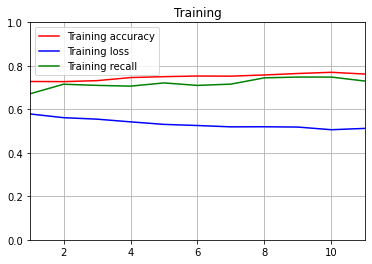

<Figure size 432x288 with 0 Axes>

In [37]:
import matplotlib.pyplot as plt

acc = history_fine.history['accuracy']
loss = history_fine.history['loss']
recall = history_fine.history['recall']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, recall, 'g', label='Training recall')
plt.title('Training')
plt.legend(loc=0)
plt.axis([1, len(acc), 0, 1])
plt.grid(True)
plt.figure()
plt.show()

**Evaluating the trained model on the test set**

In [38]:
#Preparing the test set for inference
test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
  custom_test_dir,
  batch_size = 20,
  class_mode = 'binary',
  shuffle = False,
  target_size = (image_size, image_size))

Found 390 images belonging to 2 classes.


In [39]:
results = model.evaluate(test_generator, steps=len(test_generator))
print(results)
for name, value in zip(model.metrics_names, results):
  print(name, ': ', value)


20/20 [==============================] - 3s 130ms/step - loss: 0.2808 - accuracy: 0.9231 - precision: 0.9470 - recall: 0.8446 - tp: 125.0000 - fp: 7.0000 - tn: 235.0000 - fn: 23.0000
[0.28075703978538513, 0.9230769276618958, 0.9469696879386902, 0.8445945978164673, 125.0, 7.0, 235.0, 23.0]
loss :  0.28075703978538513
accuracy :  0.9230769276618958
precision :  0.9469696879386902
recall :  0.8445945978164673
tp :  125.0
fp :  7.0
tn :  235.0
fn :  23.0


We seem to get a pretty good accuracy on our test set as well as precision and recall scores, meaning we are doing well with false positives and false negatives.

**Plotting the confusion matrix**

Text(0.5, 24.0, 'Predicted label')

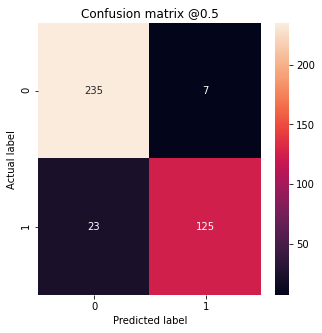

In [40]:
# Plot
true_positives = int(results[4])
false_positives = int(results[5])
true_negatives = int(results[6])
false_negatives = int(results[7])
cm = [[true_negatives,false_positives],[false_negatives,true_positives]]
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix @{:.1f}'.format(threshold))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Comparison of the model on train and val sets**

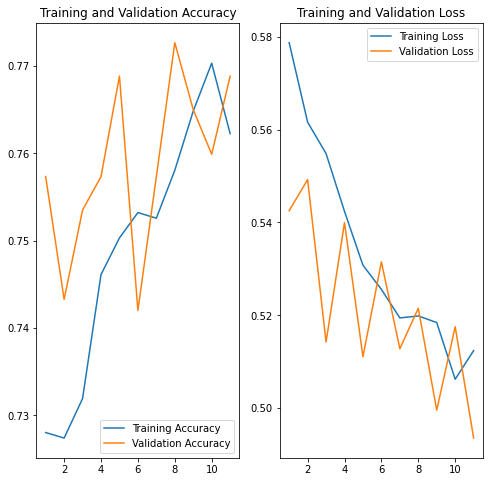

In [41]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

# epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()